In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Data Cleaning
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

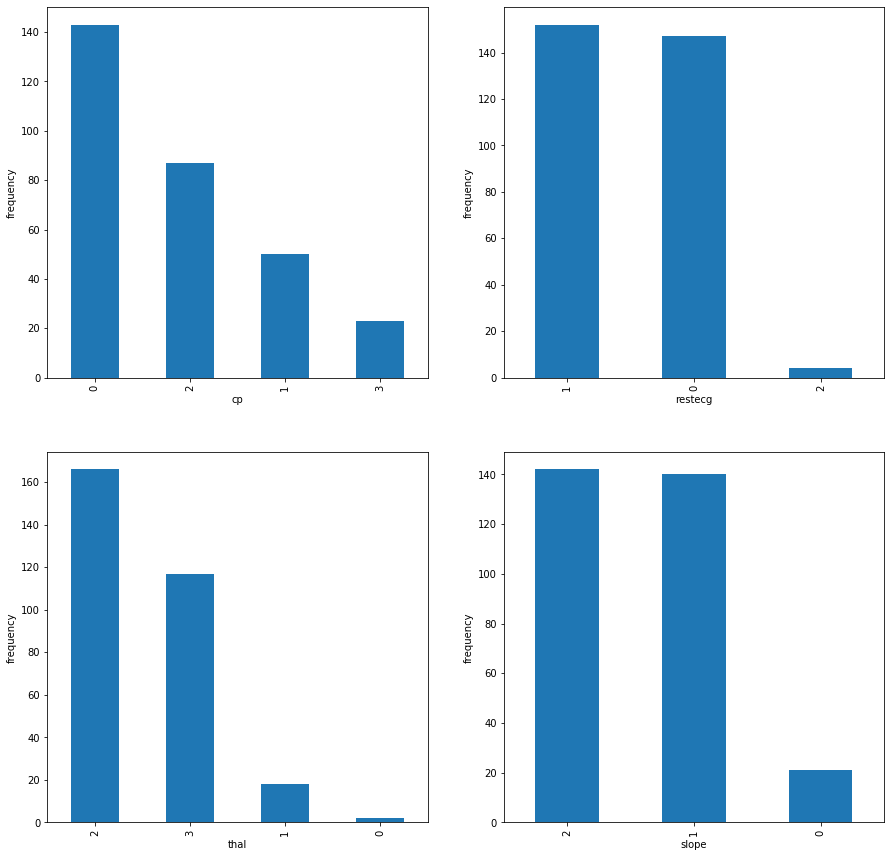

In [37]:
#dealing with categorical variables
#plotting frequnecies of {cp,restecg,thal,slope}
var = ["cp","restecg","thal","slope"]
plt.figure(figsize = (15,15))
gs = plt.GridSpec(2,2)

plt.subplot(gs[0,0])
X[var[0]].value_counts().plot(kind = 'bar')
plt.xlabel('cp')
plt.ylabel('frequency')

plt.subplot(gs[0,1])
X[var[1]].value_counts().plot(kind = 'bar')
plt.xlabel('restecg')
plt.ylabel('frequency')

plt.subplot(gs[1,0])
X[var[2]].value_counts().plot(kind = 'bar')
plt.xlabel('thal')
plt.ylabel('frequency')

plt.subplot(gs[1,1])
X[var[3]].value_counts().plot(kind = 'bar')
plt.xlabel('slope')
plt.ylabel('frequency')

plt.show()

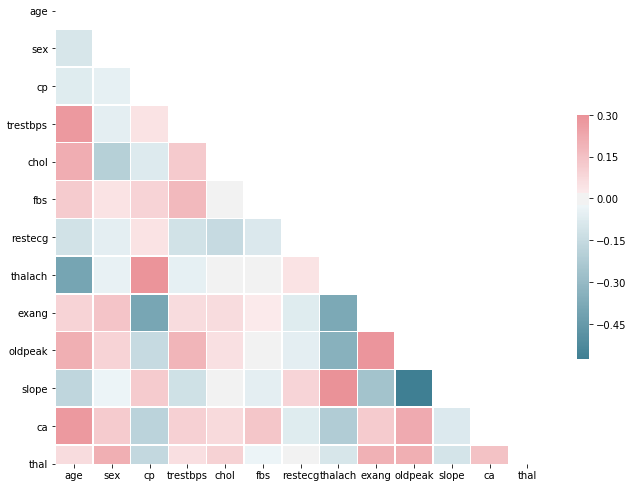

In [17]:
#plot correlation matrix of numerical varibles
import seaborn as sns
d_corr = X.corr()

mask = np.triu(np.ones_like(d_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [18]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(categorical_features = [2,6,10,12])
X = oe.fit_transform(X)

/home/dean/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/dean/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [28]:
from sklearn.ensemble import RandomForestClassifier
rndFor = RandomForestClassifier(n_estimators = 100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

rndFor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_predicted = rndFor.predict(X_test)

In [30]:
rndFor.score(X_test, y_test)

0.8852459016393442

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8852459016393442